In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import numpy as np
from matplotlib import pylab as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

Генерируем выборку

In [46]:
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class = 1, n_informative=2, n_redundant=0, random_state=18)

Визуализируем получившиюся выборку, где каждому классу соотвествует свой цвет

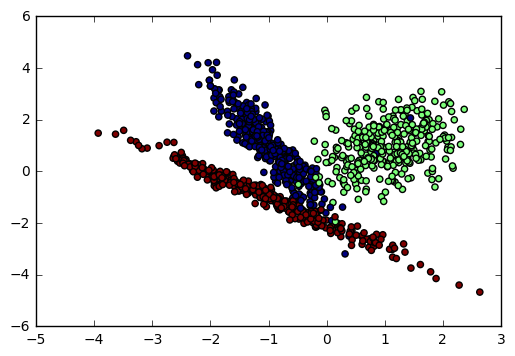

In [47]:
plt.scatter([x[0] for x in X], [x[1] for x in X], marker='o', c=y)

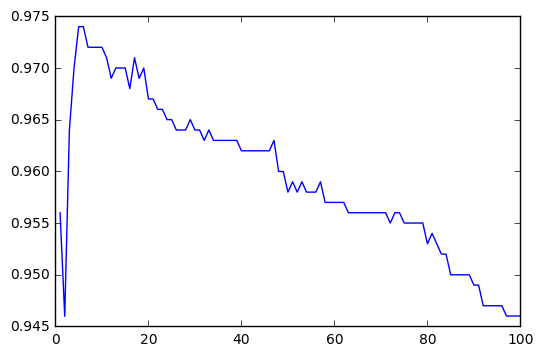

In [48]:
krange = range(1,101)
accuracies = []
for i in krange:
    classifier = KNeighborsClassifier(n_neighbors = i)
    accuracies.append(cross_val_score(classifier, X, y, scoring='accuracy', cv=5).mean())
plt.plot(krange, accuracies)

In [49]:
print("Maximum accuracy is achieved at {} nieghbors.".format(accuracies.index(max(accuracies)) + 1))

Maximum accuracy is achieved at 5 nieghbors.


Получаем оптимальное число соседей 5.

In [50]:
X_train_data, X_test_data, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_data, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

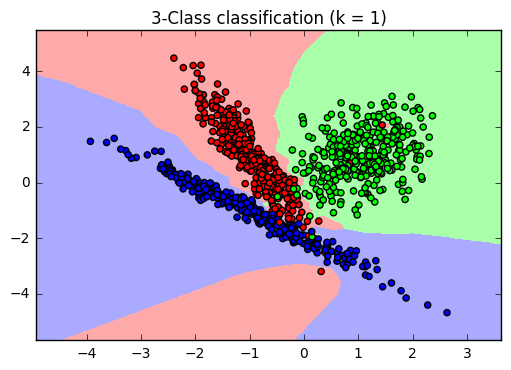

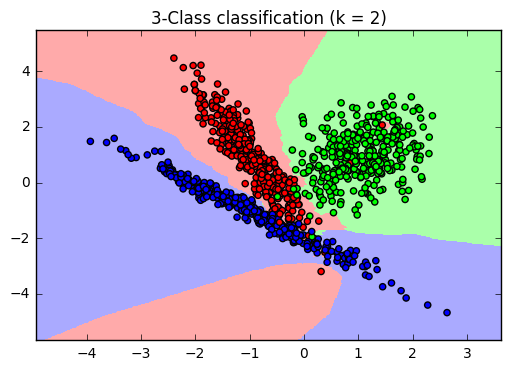

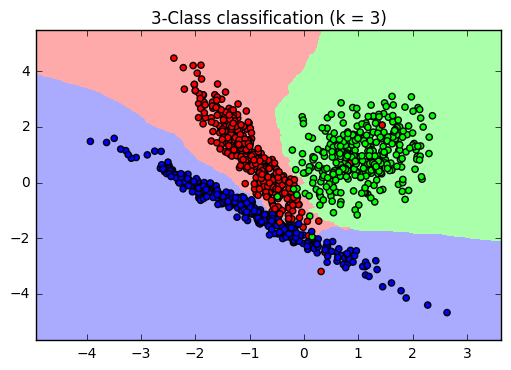

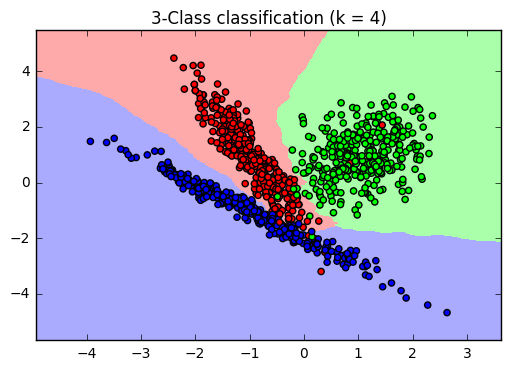

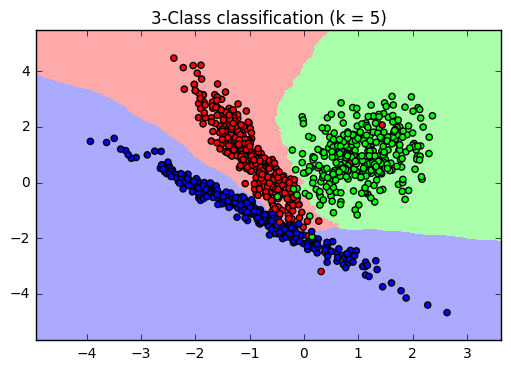

In [53]:
n_neighbors=5
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for i in range(1,6):
    clf = KNeighborsClassifier(i)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % i)

plt.show()